In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [4]:
df =pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

Get the numerical variables from our dataset.

In [6]:
numericals=df.select_dtypes("integer", "float")

In [7]:
numericals.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

In [22]:
def plot_hist(numericals):
    plt_size = len(numericals.columns)
    fig, ax = plt.subplots(plt_size, figsize=(16,16))
    n = 0
    for i in numericals.columns:
        sns.histplot( x=numericals[i], ax = ax[n])
        n += 1
    
    plt.tight_layout()    
    plt.show()

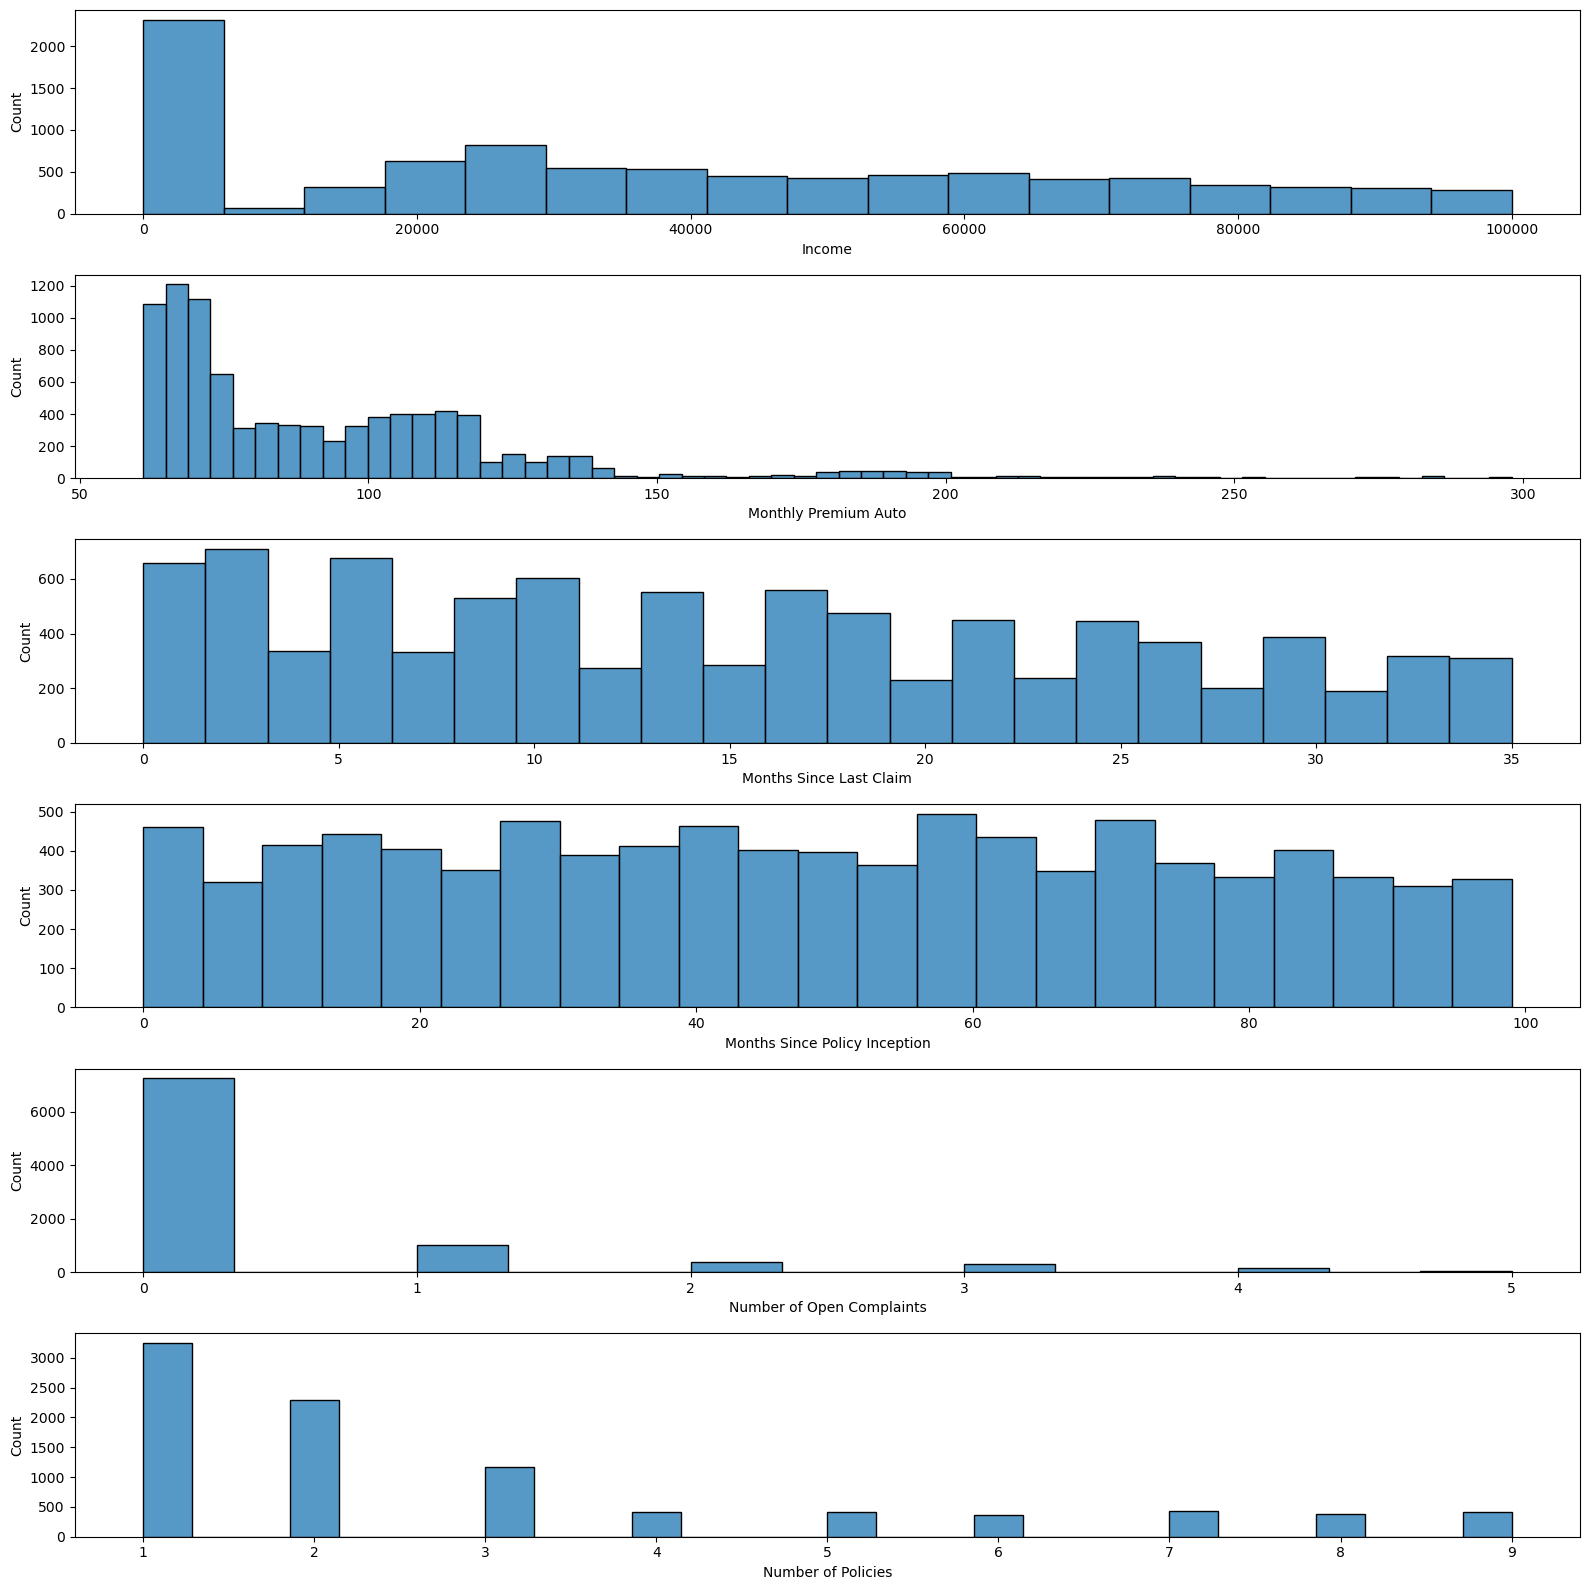

In [23]:
plot_hist(numericals)

In [ ]:
# Number of policies, number of open complaints, monthly premium auto and income seem to follow an exponential distribution

In [ ]:
# Months since policy inception and months since last claim do not seem to follow either of the proposed distributions

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [48]:
#Note: not possible to use box-cox since out data includes 0, and it only works on strictly positive values.
from scipy import stats

from sklearn.preprocessing import PowerTransformer



In [53]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(numericals)
data_trans= pd.DataFrame(data_trans, columns = numericals.columns)


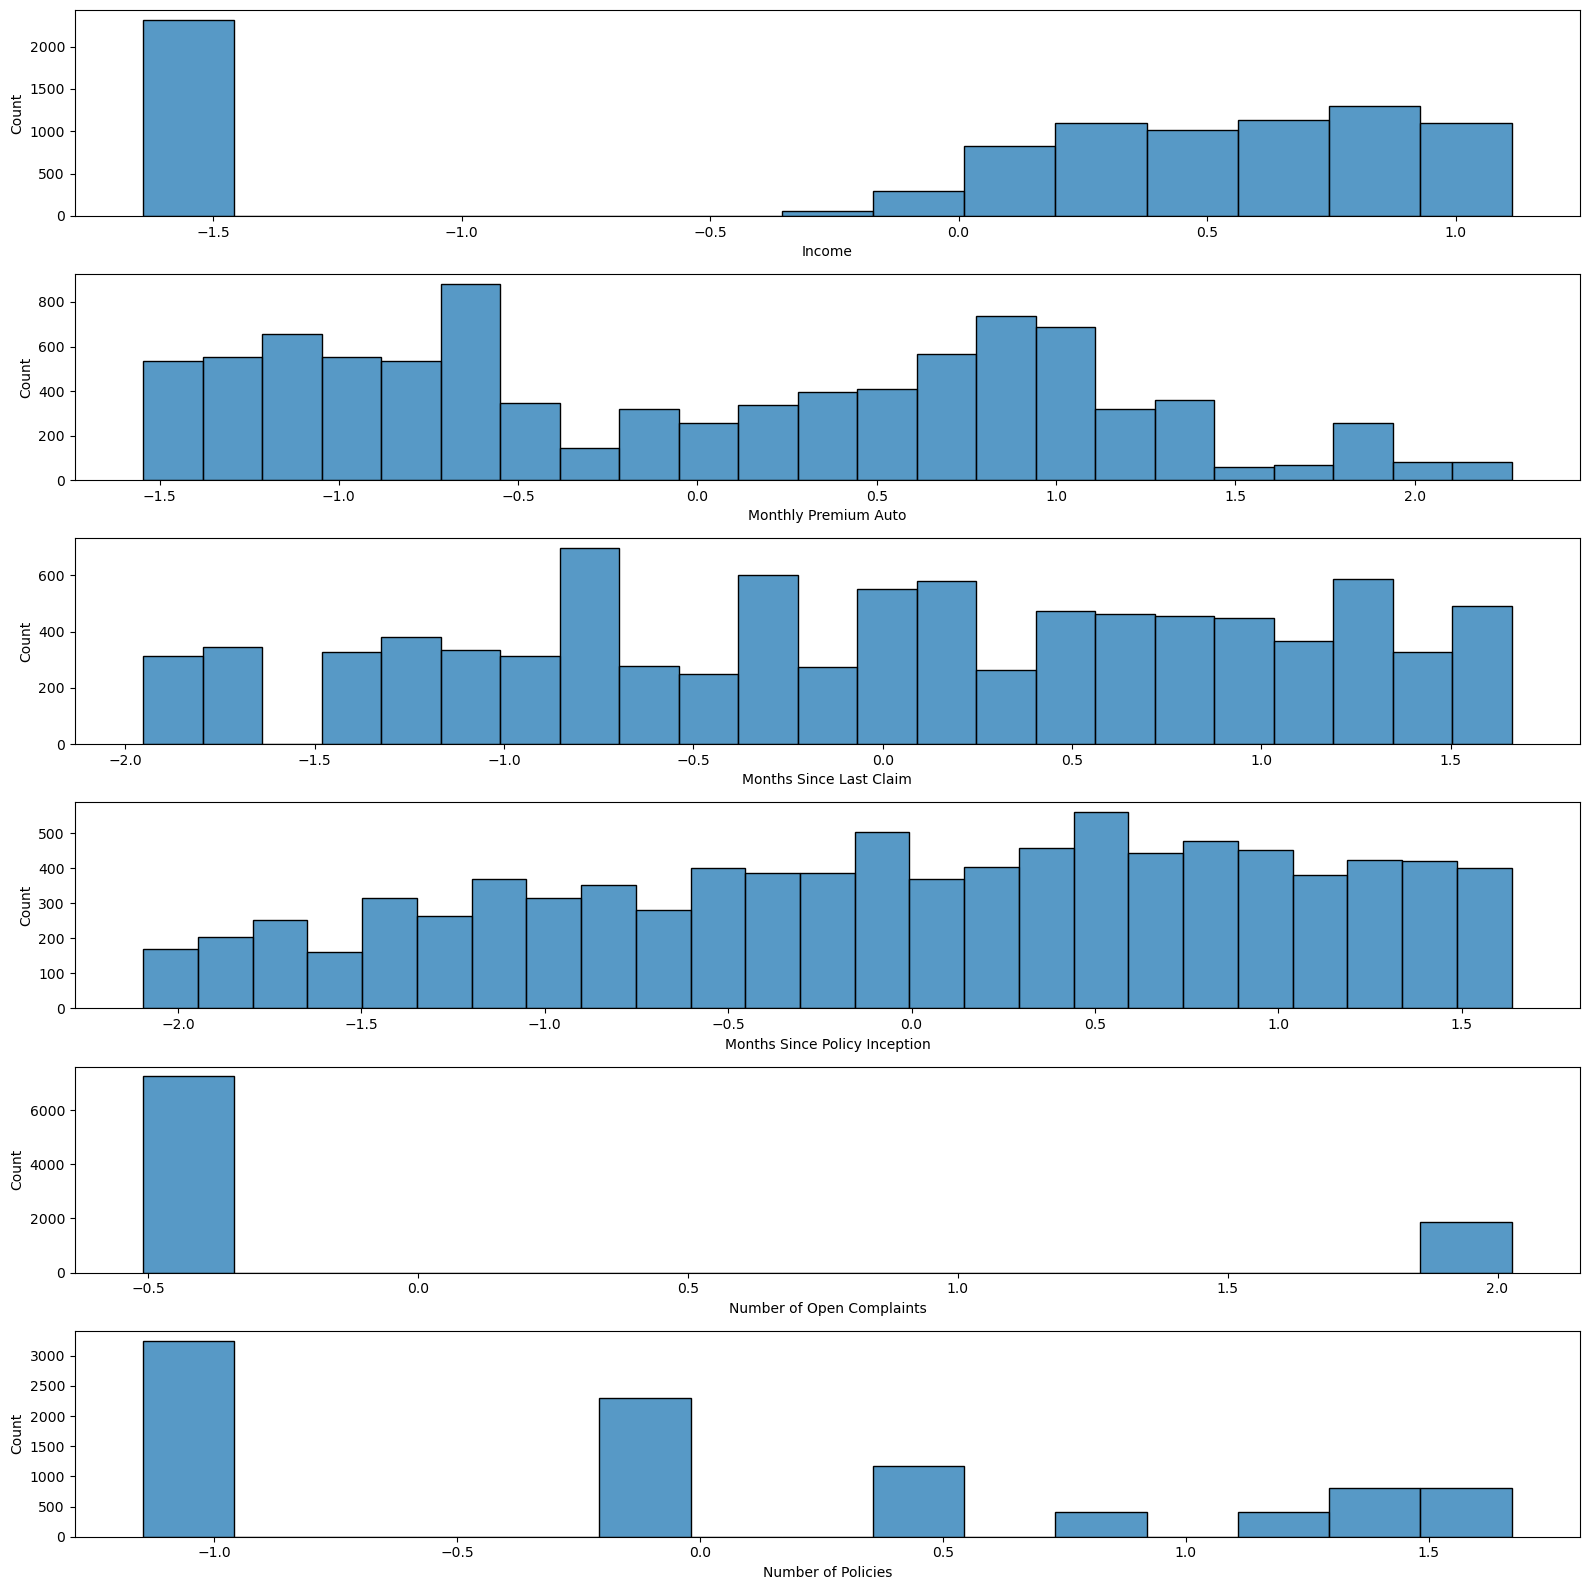

In [54]:
plot_hist(data_trans)

In [ ]:
# Yeo-Joyhnson does not seem to change the outcome